In [ ]:
!pip install stepwise-regression

In [ ]:
import pandas as pd
import statsmodels.api as sm
from stepwise_regression import step_reg

In [ ]:
url = 'https://raw.githubusercontent.com/Sid-149/Life-Expectancy-Predictor-Comparative-Analysis/main/Notebooks/Life%20Expectancy%20Data.csv'

df = pd.read_csv(url,index_col=False)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
missings = df.isna().sum().sum()
print(f'Missings:{missings}')

Missings:2563


In [ ]:
df_impute =df.interpolate(method='linear')

In [ ]:
X = df_impute.drop(['Country','Status','Life expectancy'],axis=1)
y = df_impute['Life expectancy']

In [ ]:
# add a constant
X = sm.add_constant(X)

# define the model and fit it
model = sm.OLS(y, X)

results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     674.9
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:36:37   Log-Likelihood:                -8310.2
No. Observations:                2938   AIC:                         1.666e+04
Df Residuals:                    2918   BIC:                         1.678e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              55.4834     35.209      1.576      0.115     -13.554     124.521
Year                               -0.0004      0.018     -0.023      0.981      -0.035       0.034
Adult Mortality                    -0.0203      0.001    -25.185      0.000      -0.022      -0.019
infant deaths                       0.1000      0.009     11.721      0.000       0.083       0.117
Alcohol                             0.1254      0.024      5.152      0.000       0.078       0.173
percentage expenditure              0.0002   7.97e-05      2.866      0.004    7.21e-05       0.000
Hepatitis B                        -0.0086      0.004     -2.339      0.019      -0.016      -0.001
Measles                         -3.107e-05   7.78e-06     -3.993      0.000   -4.63e-05   -1.58e-05
BMI                                 0.0475      0.005      9.648      0.000       0.038       0.057
under-five deaths                  -0.0752      0.006    -12.019      0.000      -0.087      -0.063
Polio                               0.0259      0.005      5.709      0.000       0.017       0.035
Total expenditure                   0.0803      0.034      2.384      0.017       0.014       0.146
Diphtheria                          0.0396      0.005      8.287      0.000       0.030       0.049
HIV/AIDS                           -0.4730      0.018    -26.454      0.000      -0.508      -0.438
GDP                               2.78e-05   1.21e-05      2.292      0.022    4.02e-06    5.16e-05
Population                       1.985e-09   1.67e-09      1.186      0.236    -1.3e-09    5.27e-09
thinness  1-19 years               -0.0870      0.051     -1.705      0.088      -0.187       0.013
thinness 5-9 years                  0.0216      0.050      0.431      0.667      -0.077       0.120
Income composition of resources     6.1946      0.644      9.615      0.000       4.931       7.458
Schooling                           0.6067      0.042     14.598      0.000       0.525       0.688
==============================================================================
Omnibus:                      148.605   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.715
Skew:                          -0.245   Prob(JB):                     4.82e-89
Kurtosis:                       4.756   Cond. No.                     2.60e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
backselect = step_reg.backward_regression(X, y, 0.05,verbose=False)
backselect

['const',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'thinness  1-19 years',
 'Income composition of resources',
 'Schooling']

In [ ]:
# add a constant
X_backselect = sm.add_constant(X)

# define the model and fit it
backmodel = sm.OLS(y, X_backselect)

backres = backmodel.fit()

backres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     674.9
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:36:51   Log-Likelihood:                -8310.2
No. Observations:                2938   AIC:                         1.666e+04
Df Residuals:                    2918   BIC:                         1.678e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              55.4834     35.209      1.576      0.115     -13.554     124.521
Year                               -0.0004      0.018     -0.023      0.981      -0.035       0.034
Adult Mortality                    -0.0203      0.001    -25.185      0.000      -0.022      -0.019
infant deaths                       0.1000      0.009     11.721      0.000       0.083       0.117
Alcohol                             0.1254      0.024      5.152      0.000       0.078       0.173
percentage expenditure              0.0002   7.97e-05      2.866      0.004    7.21e-05       0.000
Hepatitis B                        -0.0086      0.004     -2.339      0.019      -0.016      -0.001
Measles                         -3.107e-05   7.78e-06     -3.993      0.000   -4.63e-05   -1.58e-05
BMI                                 0.0475      0.005      9.648      0.000       0.038       0.057
under-five deaths                  -0.0752      0.006    -12.019      0.000      -0.087      -0.063
Polio                               0.0259      0.005      5.709      0.000       0.017       0.035
Total expenditure                   0.0803      0.034      2.384      0.017       0.014       0.146
Diphtheria                          0.0396      0.005      8.287      0.000       0.030       0.049
HIV/AIDS                           -0.4730      0.018    -26.454      0.000      -0.508      -0.438
GDP                               2.78e-05   1.21e-05      2.292      0.022    4.02e-06    5.16e-05
Population                       1.985e-09   1.67e-09      1.186      0.236    -1.3e-09    5.27e-09
thinness  1-19 years               -0.0870      0.051     -1.705      0.088      -0.187       0.013
thinness 5-9 years                  0.0216      0.050      0.431      0.667      -0.077       0.120
Income composition of resources     6.1946      0.644      9.615      0.000       4.931       7.458
Schooling                           0.6067      0.042     14.598      0.000       0.525       0.688
==============================================================================
Omnibus:                      148.605   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.715
Skew:                          -0.245   Prob(JB):                     4.82e-89
Kurtosis:                       4.756   Cond. No.                     2.60e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


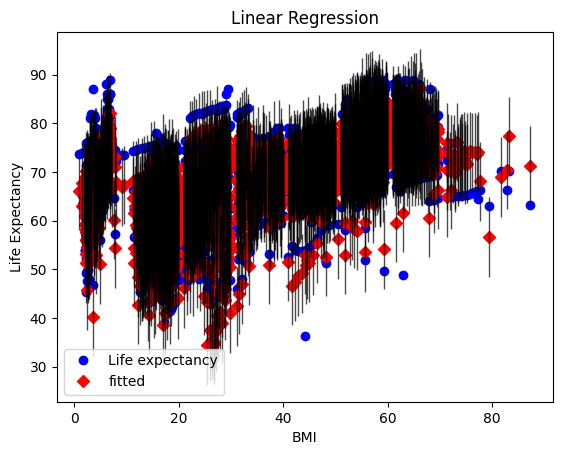

In [ ]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(backres, 8, ax=ax)
ax.set_ylabel("Life Expectancy")
ax.set_xlabel("BMI")
ax.set_title("Linear Regression")
plt.show()

In [ ]:
# add a constant
X_backselect = sm.add_constant(X)

# define the model and fit it
backmodel = sm.OLS(y, X_backselect)

backres = backmodel.fit()

backres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     674.9
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:36:51   Log-Likelihood:                -8310.2
No. Observations:                2938   AIC:                         1.666e+04
Df Residuals:                    2918   BIC:                         1.678e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              55.4834     35.209      1.576      0.115     -13.554     124.521
Year                               -0.0004      0.018     -0.023      0.981      -0.035       0.034
Adult Mortality                    -0.0203      0.001    -25.185      0.000      -0.022      -0.019
infant deaths                       0.1000      0.009     11.721      0.000       0.083       0.117
Alcohol                             0.1254      0.024      5.152      0.000       0.078       0.173
percentage expenditure              0.0002   7.97e-05      2.866      0.004    7.21e-05       0.000
Hepatitis B                        -0.0086      0.004     -2.339      0.019      -0.016      -0.001
Measles                         -3.107e-05   7.78e-06     -3.993      0.000   -4.63e-05   -1.58e-05
BMI                                 0.0475      0.005      9.648      0.000       0.038       0.057
under-five deaths                  -0.0752      0.006    -12.019      0.000      -0.087      -0.063
Polio                               0.0259      0.005      5.709      0.000       0.017       0.035
Total expenditure                   0.0803      0.034      2.384      0.017       0.014       0.146
Diphtheria                          0.0396      0.005      8.287      0.000       0.030       0.049
HIV/AIDS                           -0.4730      0.018    -26.454      0.000      -0.508      -0.438
GDP                               2.78e-05   1.21e-05      2.292      0.022    4.02e-06    5.16e-05
Population                       1.985e-09   1.67e-09      1.186      0.236    -1.3e-09    5.27e-09
thinness  1-19 years               -0.0870      0.051     -1.705      0.088      -0.187       0.013
thinness 5-9 years                  0.0216      0.050      0.431      0.667      -0.077       0.120
Income composition of resources     6.1946      0.644      9.615      0.000       4.931       7.458
Schooling                           0.6067      0.042     14.598      0.000       0.525       0.688
==============================================================================
Omnibus:                      148.605   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.715
Skew:                          -0.245   Prob(JB):                     4.82e-89
Kurtosis:                       4.756   Cond. No.                     2.60e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
forwardselect = step_reg.forward_regression(X, y, 0.05,verbose=True)
forwardselect

/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Income composition of resources with p-value 0.0


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  const                          with p-value 0.0


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Adult Mortality                with p-value 1.46726e-289


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  HIV/AIDS                       with p-value 1.74524e-98


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Schooling                      with p-value 3.57865e-97


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Diphtheria                     with p-value 4.68612e-63


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  BMI                            with p-value 4.51301e-40


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  percentage expenditure         with p-value 6.49989e-23


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Measles                        with p-value 4.46714e-12


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Polio                          with p-value 1.75187e-09


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Alcohol                        with p-value 2.17519e-06


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  thinness  1-19 years           with p-value 0.00146416


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Hepatitis B                    with p-value 0.00552231


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Total expenditure              with p-value 0.0271384


/usr/local/lib/python3.10/dist-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


['Income composition of resources',
 'const',
 'Adult Mortality',
 'HIV/AIDS',
 'Schooling',
 'Diphtheria',
 'BMI',
 'percentage expenditure',
 'Measles',
 'Polio',
 'Alcohol',
 'thinness  1-19 years',
 'Hepatitis B',
 'Total expenditure']

In [ ]:
# add a constant
X_forwardselect = sm.add_constant(X)

# define the model and fit it
forwardmodel = sm.OLS(y, X_forwardselect)

forwardres = forwardmodel.fit()

forwardres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     674.9
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:38:08   Log-Likelihood:                -8310.2
No. Observations:                2938   AIC:                         1.666e+04
Df Residuals:                    2918   BIC:                         1.678e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              55.4834     35.209      1.576      0.115     -13.554     124.521
Year                               -0.0004      0.018     -0.023      0.981      -0.035       0.034
Adult Mortality                    -0.0203      0.001    -25.185      0.000      -0.022      -0.019
infant deaths                       0.1000      0.009     11.721      0.000       0.083       0.117
Alcohol                             0.1254      0.024      5.152      0.000       0.078       0.173
percentage expenditure              0.0002   7.97e-05      2.866      0.004    7.21e-05       0.000
Hepatitis B                        -0.0086      0.004     -2.339      0.019      -0.016      -0.001
Measles                         -3.107e-05   7.78e-06     -3.993      0.000   -4.63e-05   -1.58e-05
BMI                                 0.0475      0.005      9.648      0.000       0.038       0.057
under-five deaths                  -0.0752      0.006    -12.019      0.000      -0.087      -0.063
Polio                               0.0259      0.005      5.709      0.000       0.017       0.035
Total expenditure                   0.0803      0.034      2.384      0.017       0.014       0.146
Diphtheria                          0.0396      0.005      8.287      0.000       0.030       0.049
HIV/AIDS                           -0.4730      0.018    -26.454      0.000      -0.508      -0.438
GDP                               2.78e-05   1.21e-05      2.292      0.022    4.02e-06    5.16e-05
Population                       1.985e-09   1.67e-09      1.186      0.236    -1.3e-09    5.27e-09
thinness  1-19 years               -0.0870      0.051     -1.705      0.088      -0.187       0.013
thinness 5-9 years                  0.0216      0.050      0.431      0.667      -0.077       0.120
Income composition of resources     6.1946      0.644      9.615      0.000       4.931       7.458
Schooling                           0.6067      0.042     14.598      0.000       0.525       0.688
==============================================================================
Omnibus:                      148.605   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.715
Skew:                          -0.245   Prob(JB):                     4.82e-89
Kurtosis:                       4.756   Cond. No.                     2.60e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""